In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
'''
1. Encoded the label and the categorical features (all features in this case).
2. Dealt with the missing values using the Most Frequent strategy.
3. Select top eleven features using Random Forest (side note: its accuracy using all features is 1).
4. Create dummy variables for the selected categorical features using One Hot Encoder.
5. Split the new data into training and testing data using train_test_split function.
6. Run GridSearchCV on both Linear SVC and RBF Kernel SVC and choose the best parameters and thus the estimator.
    the Linear SVC with error penalty term C = 0.1 came out to be the best and its accuracy is 1.
7. Try also KNN Classifier. With n_neighbors = 5, its accuracy is also 1.

In this case, after data preprocessing, feature selection, and tuning for right parameters, 
both SVC and KNN Classifier turn out to be pretty accurate on the test data.

'''

In [3]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'mushroom/agaricus-lepiota.data', header=None, engine='python')
column_name = ['classes','cap-shape', 'cap-surface','cap-color','bruises?','odor',
               'gill-attachment','gill-spacing','gill-size','gill-color',
               'stalk-shape','stalk-root','stalk-surface-above-ring',
               'stalk-surface-below-ring','stalk-color-above-ring',
               'stalk-color-below-ring','veil-type','veil-color','ring-number',
               'ring-type','spore-print-color','population','habitat']
df.columns = column_name
df.head()

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# encode label first
label_le = LabelEncoder()
df['classes'] = label_le.fit_transform(df['classes'].values)

catego_features = column_name[1:]
catego_le = LabelEncoder()

# transform categorical values into numerical values
# be careful that '?' will also be encoded
# we have to replace it to NaN in numerical
num_values = []
for i in catego_features:
    df[i] = catego_le.fit_transform(df[i].values)
    classes_list = catego_le.classes_.tolist()
    
    # store the total number of values
    num_values.append(len(classes_list))
    
    # replace '?' with 'NaN'
    if '?' in classes_list:
        idx = classes_list.index('?')
        df[i] = df[i].replace(idx, np.nan)

display(df.head(15))

# count the number of missing values per column
display(df.isnull().sum())

,classes,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [5]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

df_impute = pd.DataFrame(imputed_data)
df_impute.columns = df.columns

# check if there are still missing values
display(df_impute.isnull().sum())

classes                     0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
from sklearn.preprocessing import OneHotEncoder

# we perform one-hot encoding on impute data 
impute_data = df_impute.values

# find the index of the categorical feature
catego_features_idx = []
for fea in catego_features:
    catego_features_idx.append(df.columns.tolist().index(fea))

# give the column index you want to do one-hot encoding
ohe = OneHotEncoder(categorical_features = catego_features_idx, sparse=False)

impute_onehot_data = ohe.fit_transform(impute_data)
print('Impute: {}'.format(impute_data.shape))
print('Impute one-hot: {}'.format(impute_onehot_data.shape))


Impute: (8124, 23)
Impute one-hot: (8124, 117)


In [14]:
print(sum(num_values))

df_ohe = pd.DataFrame(impute_onehot_data)
print(df_ohe.shape)

117
(8124, 117)


In [15]:
X = df_impute.drop(['classes'], axis=1)
y = df_impute['classes']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

Accuracy (forest): 1.00
 1) odor                           0.180386
 2) gill-size                      0.111734
 3) spore-print-color              0.107051
 4) gill-color                     0.104666
 5) ring-type                      0.064153
 6) population                     0.055408
 7) bruises?                       0.044816
 8) stalk-surface-above-ring       0.044481
 9) stalk-root                     0.043381
10) stalk-surface-below-ring       0.041378
11) gill-spacing                   0.041118
12) habitat                        0.034758
13) stalk-shape                    0.028960
14) stalk-color-above-ring         0.022823
15) stalk-color-below-ring         0.022002
16) cap-color                      0.015286
17) ring-number                    0.013833
18) cap-surface                    0.012418
19) cap-shape                      0.005545
20) veil-color                     0.003089
21) gill-attachment                0.002713
22) veil-type                      0.000000


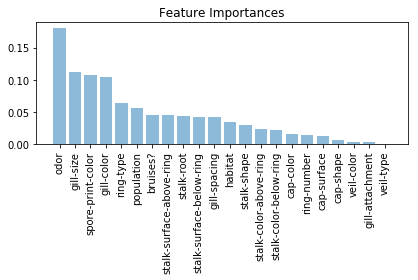

In [23]:
# feature selection using random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


forest = RandomForestClassifier(criterion='entropy',
                                n_estimators=1000, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print('Accuracy (forest): %.2f' % accuracy_score(y_test, y_pred))

importances = forest.feature_importances_
# get sort indices in descending order
indices = np.argsort(importances)[::-1]

fea_imp = []
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            X.columns.values[indices[f]], 
                            importances[indices[f]]))
    fea_imp.append(X.columns.values[indices[f]])

plt.figure()
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center',
        alpha=0.5)

plt.xticks(range(X_train.shape[1]), 
           X.columns.values[indices], rotation=90)
plt.tight_layout()
plt.savefig('./output/fig-forest-feature-importances.png', dpi=300)
plt.show()

In [26]:
#choose top 11 features to train another model

top_ele_fea = fea_imp[:11]

X_top_ele = df_impute[top_ele_fea]
y = df_impute['classes']

X_top_ele.shape

(8124, 11)

In [29]:
# we perform one-hot encoding
top_ele_data = X_top_ele.values

# give the column index you want to do one-hot encoding
ohe = OneHotEncoder(categorical_features = range(11), sparse=False)

top_ele_ohe = ohe.fit_transform(top_ele_data)

print('Top eleven features one-hot: {}'.format(top_ele_ohe.shape))


Top eleven features one-hot: (8124, 59)


In [31]:
X_top_ele_ohe = pd.DataFrame(top_ele_ohe)

X_top_ele_train, X_top_ele_test, y_top_ele_train, y_top_ele_test = train_test_split(
    X_top_ele_ohe, y, test_size=0.2, random_state=0)


In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# use the pipeline model to train
pipe_svm = Pipeline([('scl', StandardScaler()),
                     ('clf', SVC(random_state=0))])

param_gamma = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_C = [0.1, 1.0, 10.0, 100.0]

# here you can set parameter for different steps 
# by adding two underlines (__) between step name and parameter name
param_grid = [{'clf__C': param_C, 
               'clf__kernel': ['linear']},
              {'clf__C': param_C, 
               'clf__gamma': param_gamma, 
               'clf__kernel': ['rbf']}]

# set pipe_svm as the estimator
gs = GridSearchCV(estimator=pipe_svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_top_ele_train, y_top_ele_train)
print('[SVC: grid search]')
print('Validation accuracy: %.3f' % gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_top_ele_train, y_top_ele_train)
print('Test accuracy: %.3f' % clf.score(X_top_ele_test, y_top_ele_test))

[SVC: grid search]
Validation accuracy: 1.000
{'clf__C': 0.1, 'clf__kernel': 'linear'}
Test accuracy: 1.000


In [44]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn_10n = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))])

pipe_knn_5n = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski'))])

pipe_knn_10n.fit(X_top_ele_train, y_top_ele_train)
y_pred = pipe_knn_10n.predict(X_top_ele_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_top_ele_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_top_ele_test, y_pred))

pipe_knn_5n.fit(X_top_ele_train, y_top_ele_train)
y_pred = pipe_knn_5n.predict(X_top_ele_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_top_ele_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_top_ele_test, y_pred))



[KNN]
Misclassified samples: 1
Accuracy: 0.9994
[KNN]
Misclassified samples: 0
Accuracy: 1.0000
